# Project 1: Seattle Airbnb Data

In [1]:
# Configuration
%run ../src/configuration.py

In [2]:
# Modules
import os
import pandas
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from src.processing import clean_calendar, clean_listings, clean_reviews, process
from src.visualization import barplot, lineplot

In [3]:
# Settings
pandas.set_option('display.max_columns', None)

In [4]:
# Parameters
folder = f'{os.getcwd()}/data'

## Airbnb Seattle Open Data

https://www.kaggle.com/datasets/airbnb/seattle

### Listings

In [5]:
# Listings
listings = pandas.read_csv(f'{folder}/listings.csv')

# Display
display(listings.head())

# Shape
print(listings.shape)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

(3818, 92)


#### Analysis

C:\Users\M85256\AppData\Local\Temp\ipykernel_29880\3972499796.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, listings.shape[0])


Text(0.5, 0.98, 'Missing values')

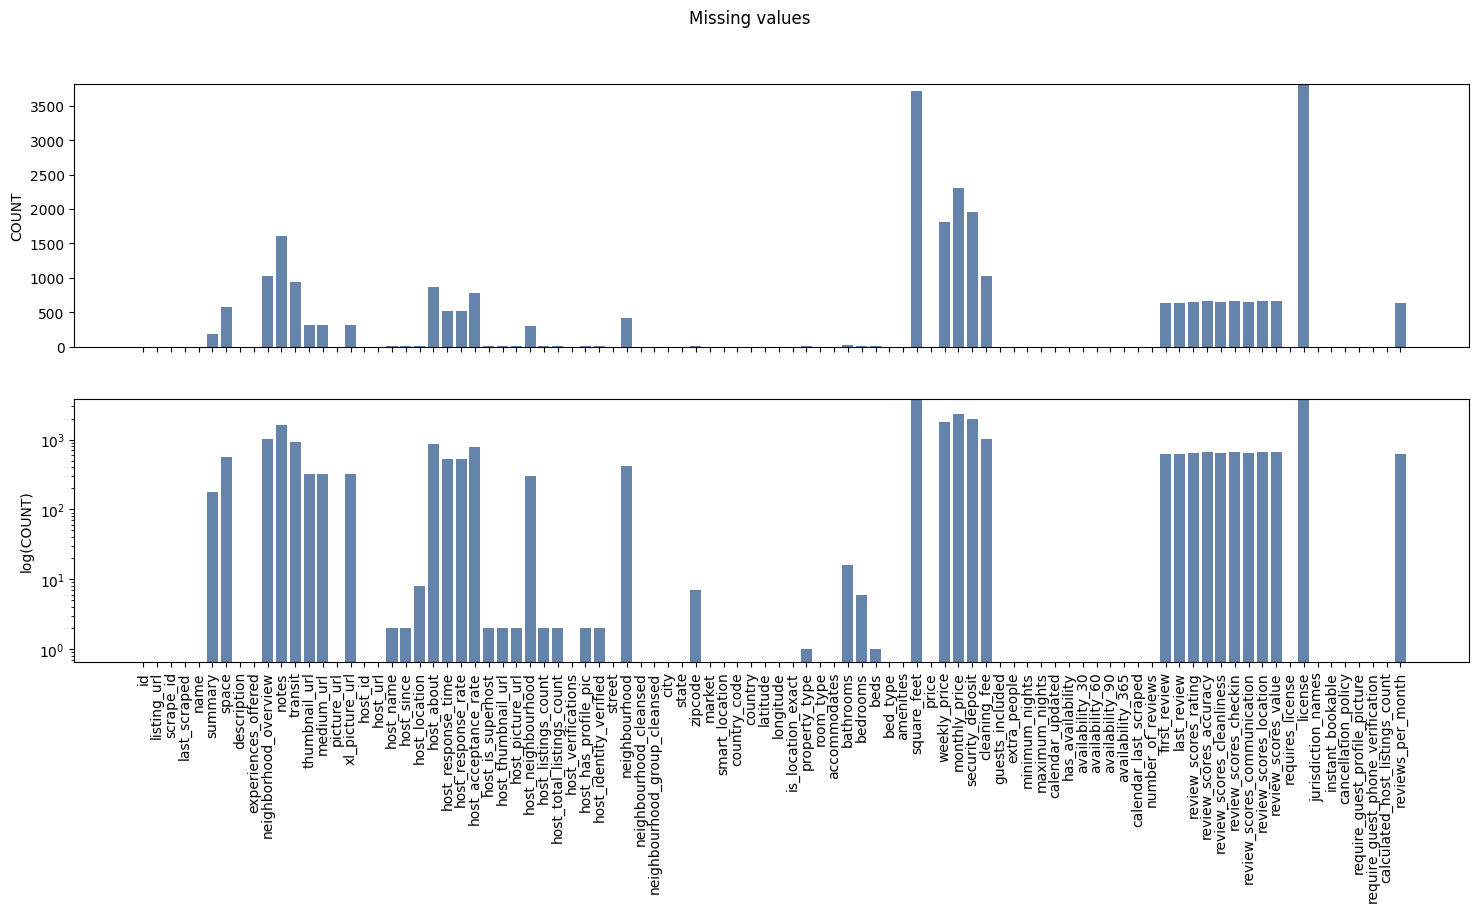

In [6]:
# Missing values
missing_values = listings.isnull().sum()

# Barplot
figure, axes = barplot(missing_values, listings.shape[1], True)
for axis in axes:
    axis.set_ylim(0, listings.shape[0])
figure.suptitle('Missing values')

C:\Users\M85256\AppData\Local\Temp\ipykernel_29880\2527506463.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, listings.shape[0])


Text(0.5, 0.98, 'Unique values')

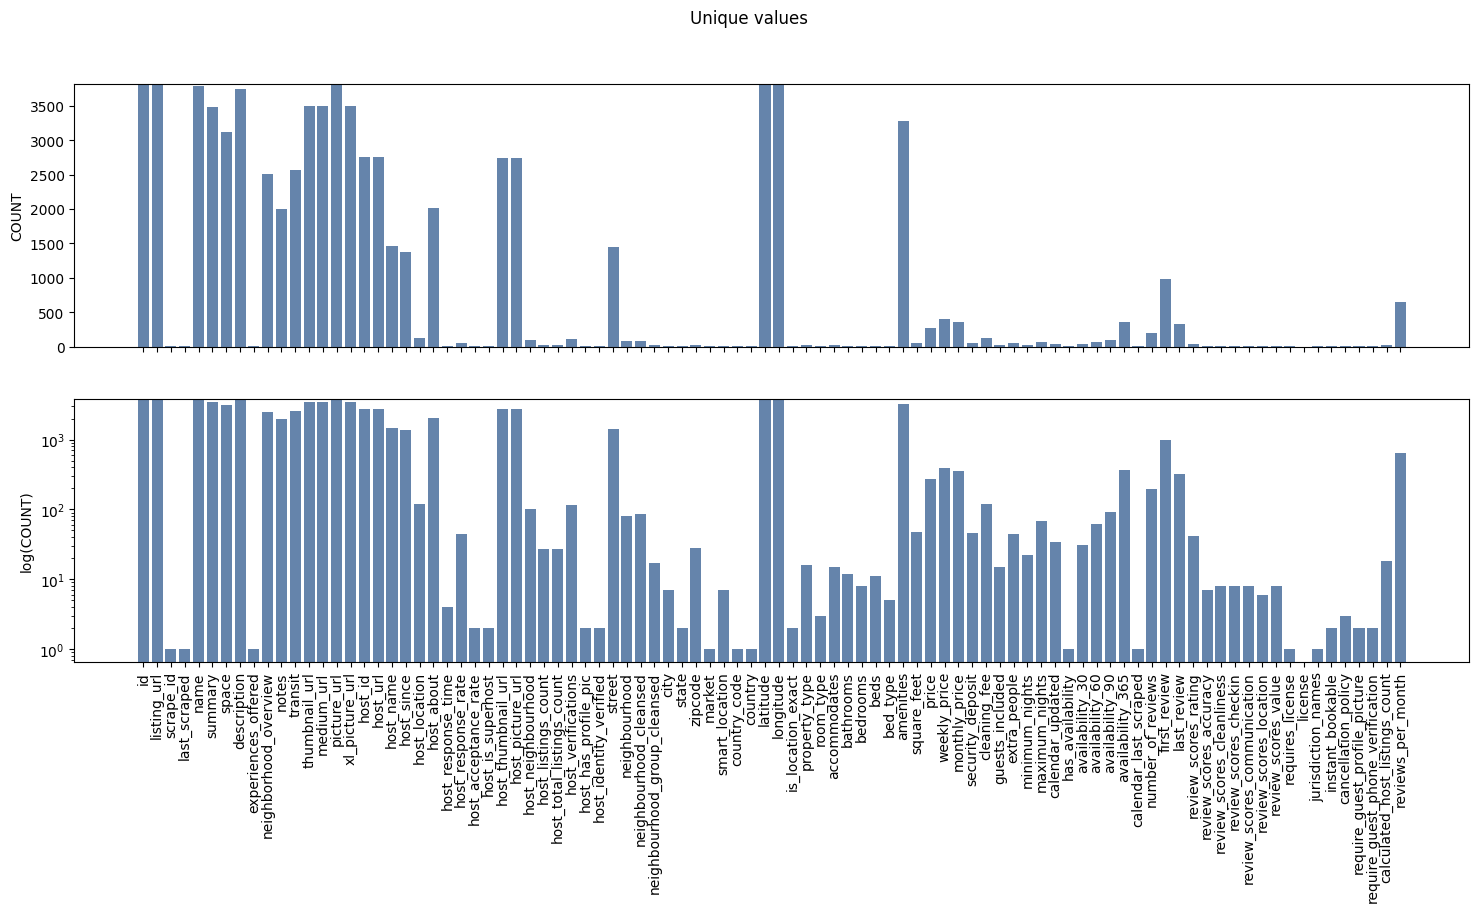

In [7]:
# Unique values
unique_values = listings.nunique()

# Barplot
figure, axes = barplot(unique_values, listings.shape[1], True)
for axis in axes:
    axis.set_ylim(0, listings.shape[0])
figure.suptitle('Unique values')

#### Cleaning data

In [8]:
# Processing listings
listings = clean_listings(listings)

# Display
display(listings.head())

# Shape
print(listings.shape)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
241032,within a few hours,96.0,100.0,0.0,3.0,1.0,Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,8500.0,NaN,NaN,2.0,500.0,207.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
953595,within an hour,98.0,100.0,1.0,6.0,1.0,Queen Anne,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,15000.0,10000.0,4000.0,1.0,0.0,43.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
3308979,within a few hours,67.0,100.0,0.0,2.0,1.0,Queen Anne,House,Entire home/apt,11.0,4.5,5.0,7.0,Real Bed,97500.0,100000.0,30000.0,10.0,2500.0,20.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
7421966,NaN,NaN,NaN,0.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,Real Bed,10000.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
278830,within an hour,100.0,NaN,0.0,2.0,1.0,Queen Anne,House,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,45000.0,70000.0,12500.0,6.0,1500.0,38.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict


(3818, 28)


### Calendar

In [9]:
# Calendar
calendar = pandas.read_csv(f'{folder}/calendar.csv')

# Display
display(calendar.head())

# Shape
print(calendar.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


#### Analysis

C:\Users\M85256\AppData\Local\Temp\ipykernel_29880\2986958182.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, calendar.shape[0])


Text(0.5, 0.98, 'Missing values')

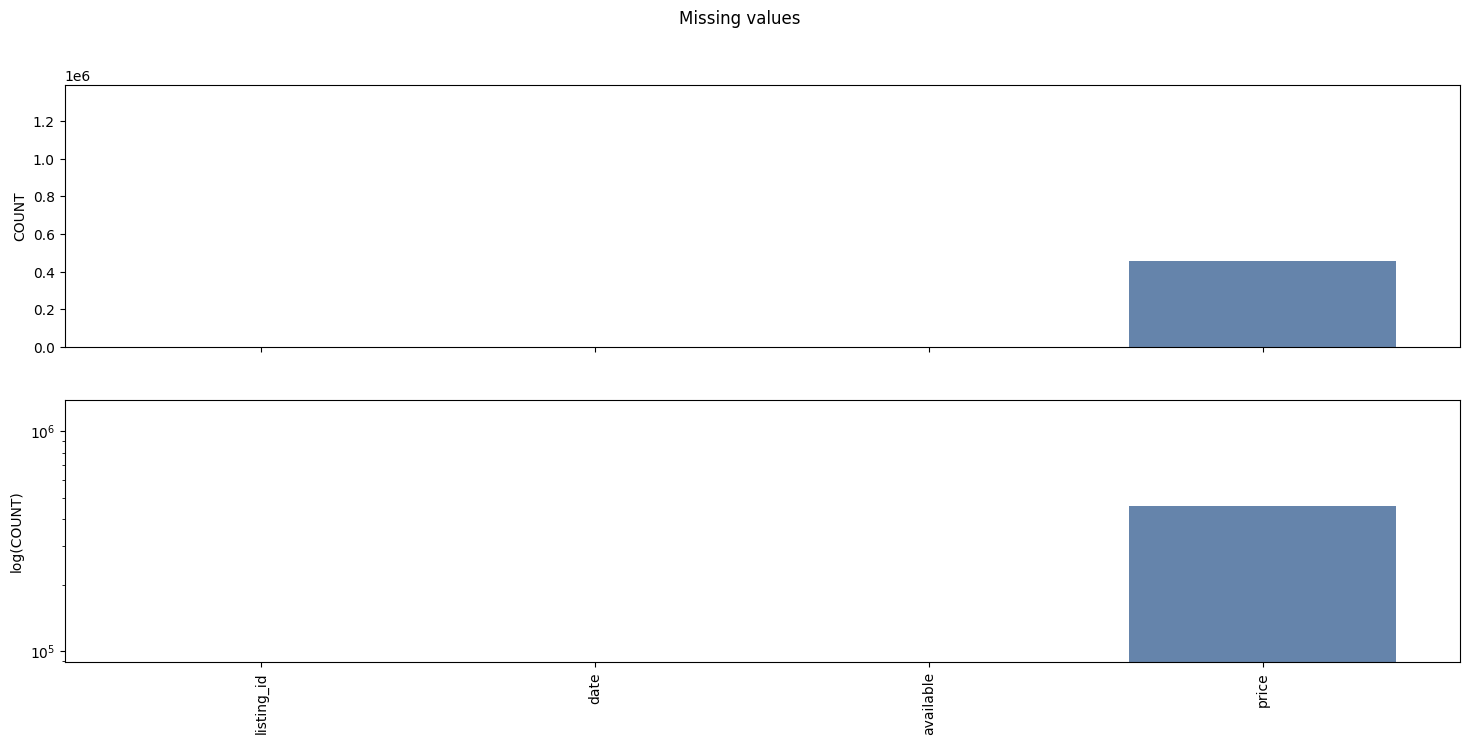

In [10]:
# Missing values
missing_values = calendar.isnull().sum()

# Barplot
figure, axes = barplot(missing_values, calendar.shape[1], True)
for axis in axes:
    axis.set_ylim(0, calendar.shape[0])
figure.suptitle('Missing values')

C:\Users\M85256\AppData\Local\Temp\ipykernel_29880\415006940.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, calendar.shape[0])


Text(0.5, 0.98, 'Unique values')

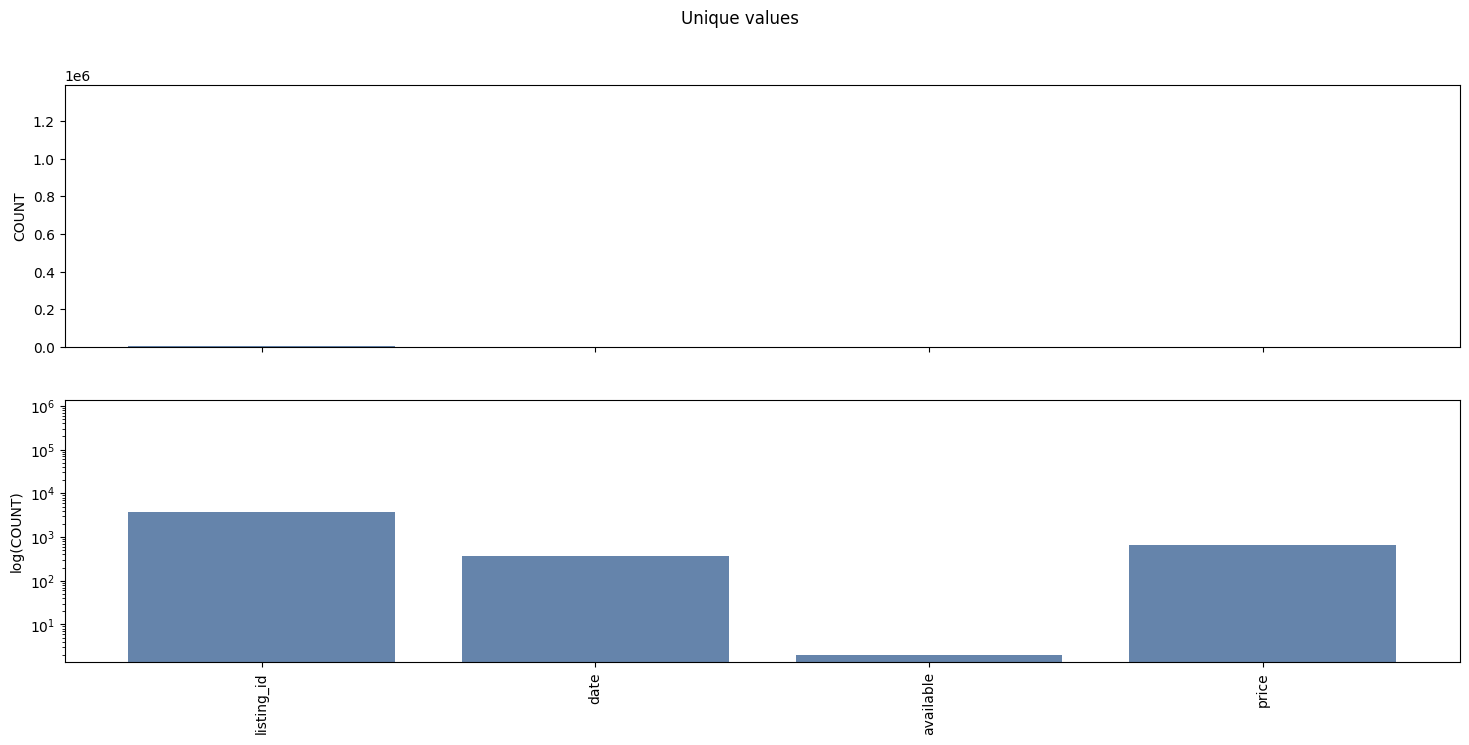

In [11]:
# Unique values
unique_values = calendar.nunique()

# Barplot
figure, axes = barplot(unique_values, calendar.shape[1], True)
for axis in axes:
    axis.set_ylim(0, calendar.shape[0])
figure.suptitle('Unique values')

#### Cleaning data

In [12]:
# Processing calendar
calendar = clean_calendar(calendar)

# Display
display(calendar.head())

# Shape
print(calendar.shape)

,listing_id,date,available,price
0,241032,2016-01-04,1.0,8500.0
1,241032,2016-01-05,1.0,8500.0
2,241032,2016-01-06,0.0,NaN
3,241032,2016-01-07,0.0,NaN
4,241032,2016-01-08,0.0,NaN


(1393570, 4)


### Reviews

In [13]:
# Reviews
reviews = pandas.read_csv(f'{folder}/reviews.csv')

# Display
display(reviews.head())

# Shape
print(reviews.shape)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 6)


#### Analysis

C:\Users\M85256\AppData\Local\Temp\ipykernel_29880\2389588455.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, reviews.shape[0])


Text(0.5, 0.98, 'Missing values')

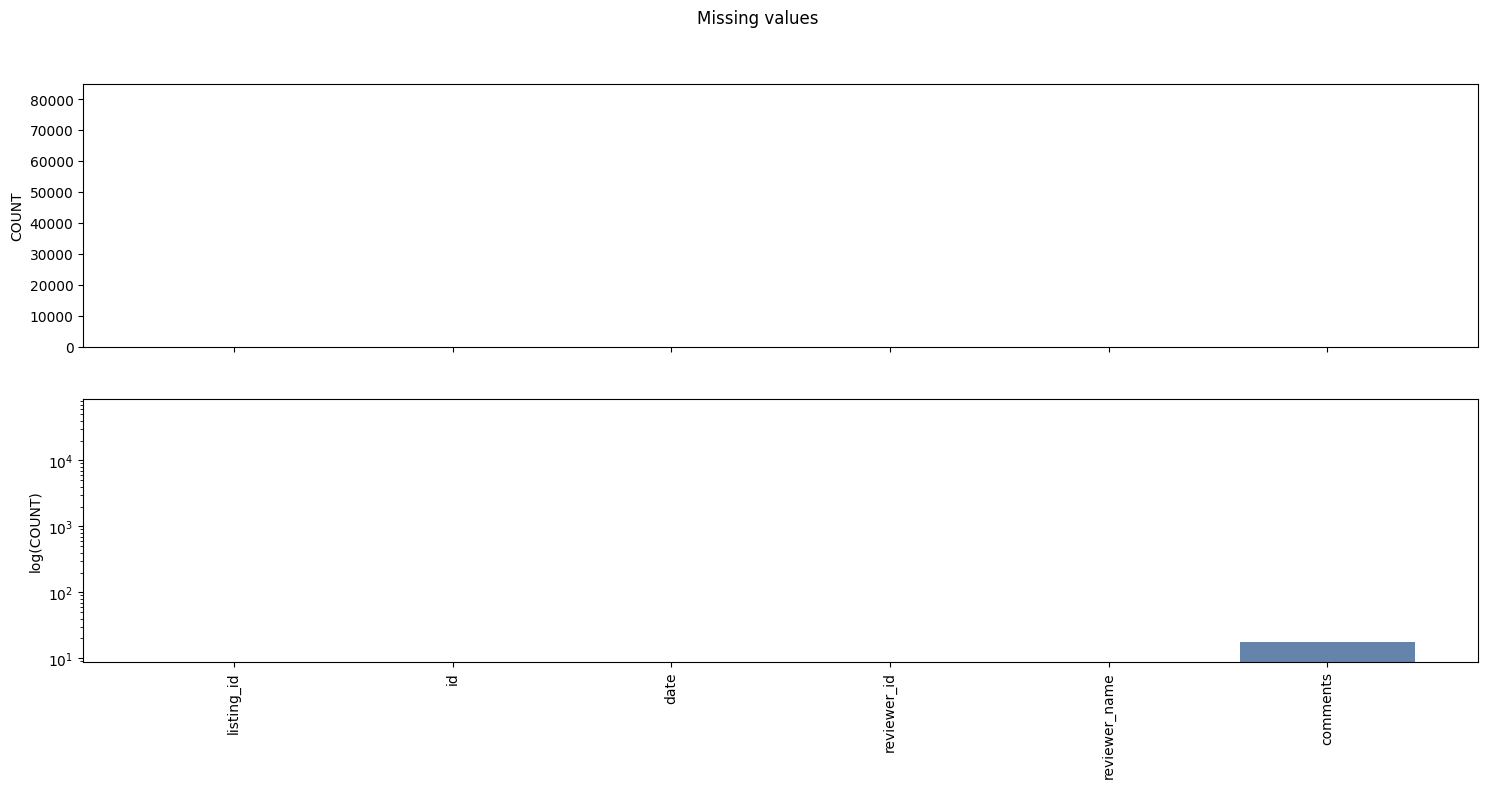

In [14]:
# Missing values
missing_values = reviews.isnull().sum()

# Barplot
figure, axes = barplot(missing_values, reviews.shape[1], True)
for axis in axes:
    axis.set_ylim(0, reviews.shape[0])
figure.suptitle('Missing values')

C:\Users\M85256\AppData\Local\Temp\ipykernel_29880\1495032809.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, reviews.shape[0])


Text(0.5, 0.98, 'Unique values')

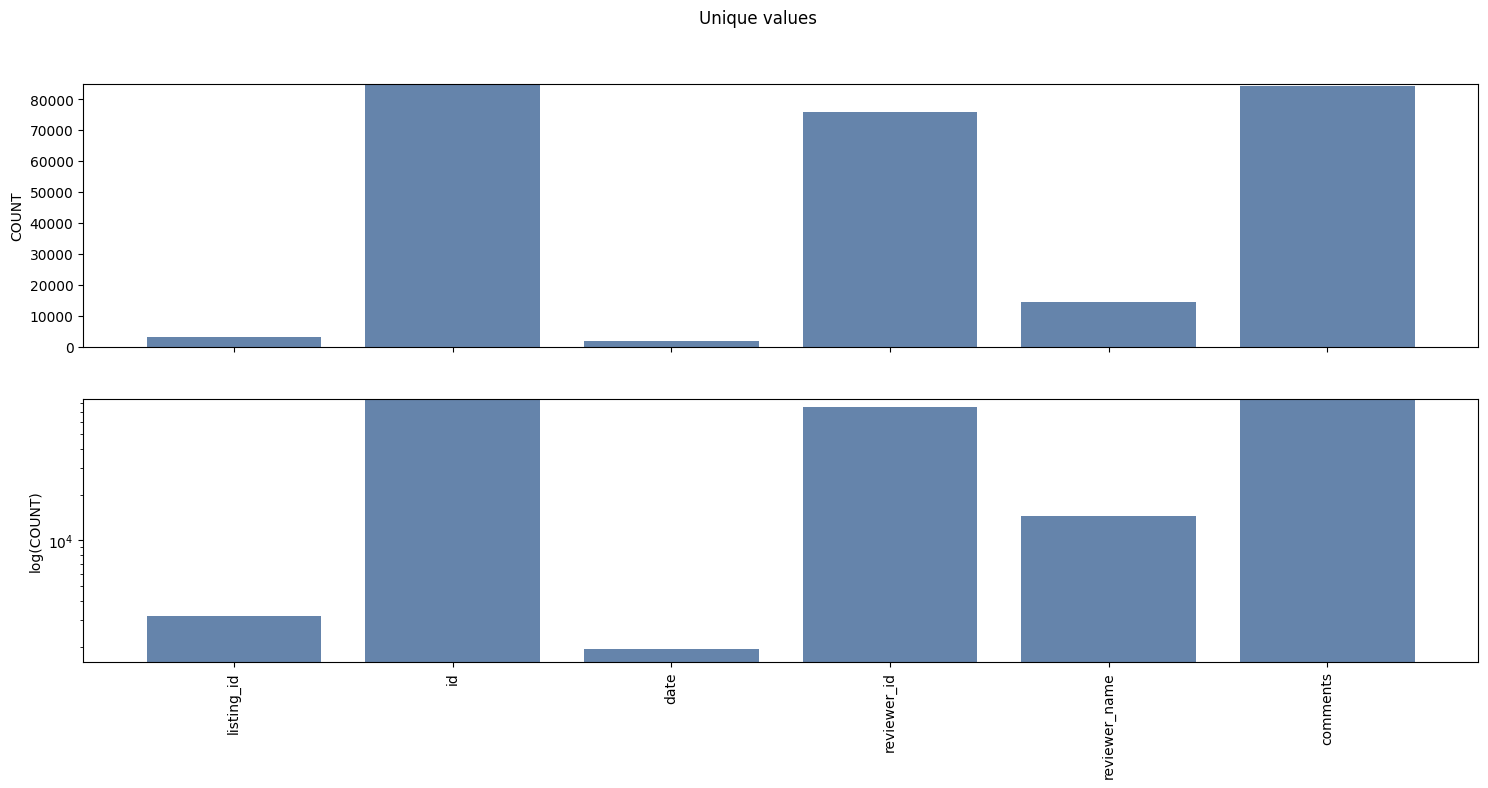

In [15]:
# Unique values
unique_values = reviews.nunique()

# Barplot
figure, axes = barplot(unique_values, reviews.shape[1], True)
for axis in axes:
    axis.set_ylim(0, reviews.shape[0])
figure.suptitle('Unique values')

#### Cleaning data

In [16]:
# Processing reviews
reviews = clean_reviews(reviews)

# Display
display(reviews.head())

# Shape
print(reviews.shape)

,listing_id,date,reviewer_id,reviewer_name,comments
id,,,,,
38917982,7202016,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
39087409,7202016,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
39820030,7202016,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
40813543,7202016,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
41986501,7202016,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 5)


## Questions

1. When is the most expensive time to visit?
2. Which are the most popular areas?
3. What features affect the price the most?

In [17]:
# Data
data = pandas.merge(
    left=calendar[calendar.date.dt.year == 2016],
    right=listings['neighbourhood'],
    how='inner',
    left_on='listing_id',
    right_on='id',
).sort_values('date')

# Display
display(data.head())

# Shape
print(data.shape)

,listing_id,date,available,price,neighbourhood
0,241032,2016-01-04,1.0,8500.0,Queen Anne
258456,8869680,2016-01-04,0.0,NaN,University District
718740,7382368,2016-01-04,0.0,NaN,Greenwood
689700,9615941,2016-01-04,0.0,NaN,Genesee
858132,1827586,2016-01-04,1.0,37500.0,Seward Park


(1385934, 5)


### Average price

Text(0, 0.5, 'Price')

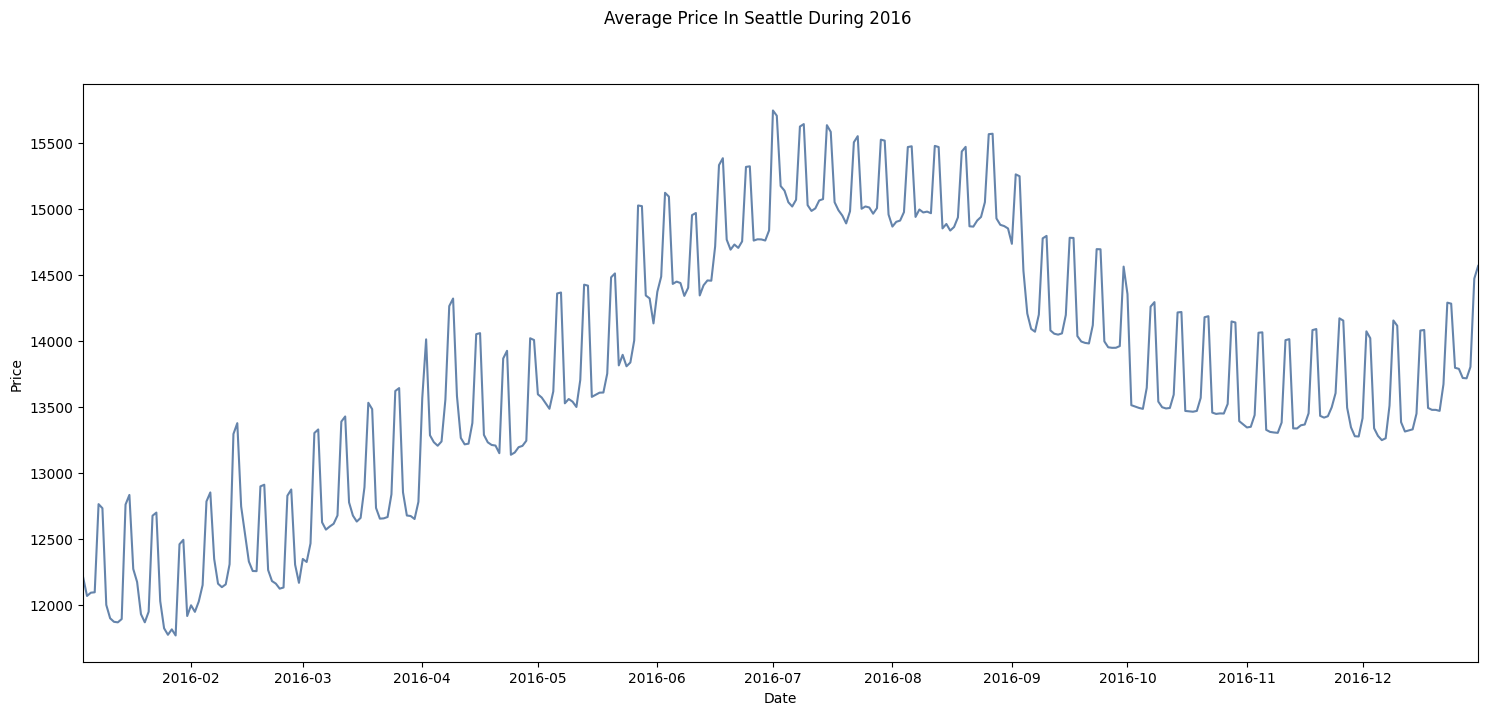

In [18]:
# Average price
price = data.groupby('date')['price'].mean().reset_index()

# Lineplot
figure, axes = lineplot(price, 'date', 'price')
figure.suptitle('Average Price In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')

### Average price per neighbourhood

In [19]:
# Parameters
top = 5

# Average price per neighbourhood
price_neighbourhoods = data.groupby('neighbourhood')['price'].mean().reset_index()

# Top neighbourhoods
top_neighbourhoods = price_neighbourhoods.sort_values('price', ascending=False).reset_index(drop=True).iloc[:top]

# Display
display(top_neighbourhoods)

,neighbourhood,price
0,Fairmount Park,37000.000000
1,Portage Bay,25085.066313
2,Industrial District,24592.680047
3,Windermere,22734.424981
4,Alki,22644.426974


Text(0, 0.5, 'Price')

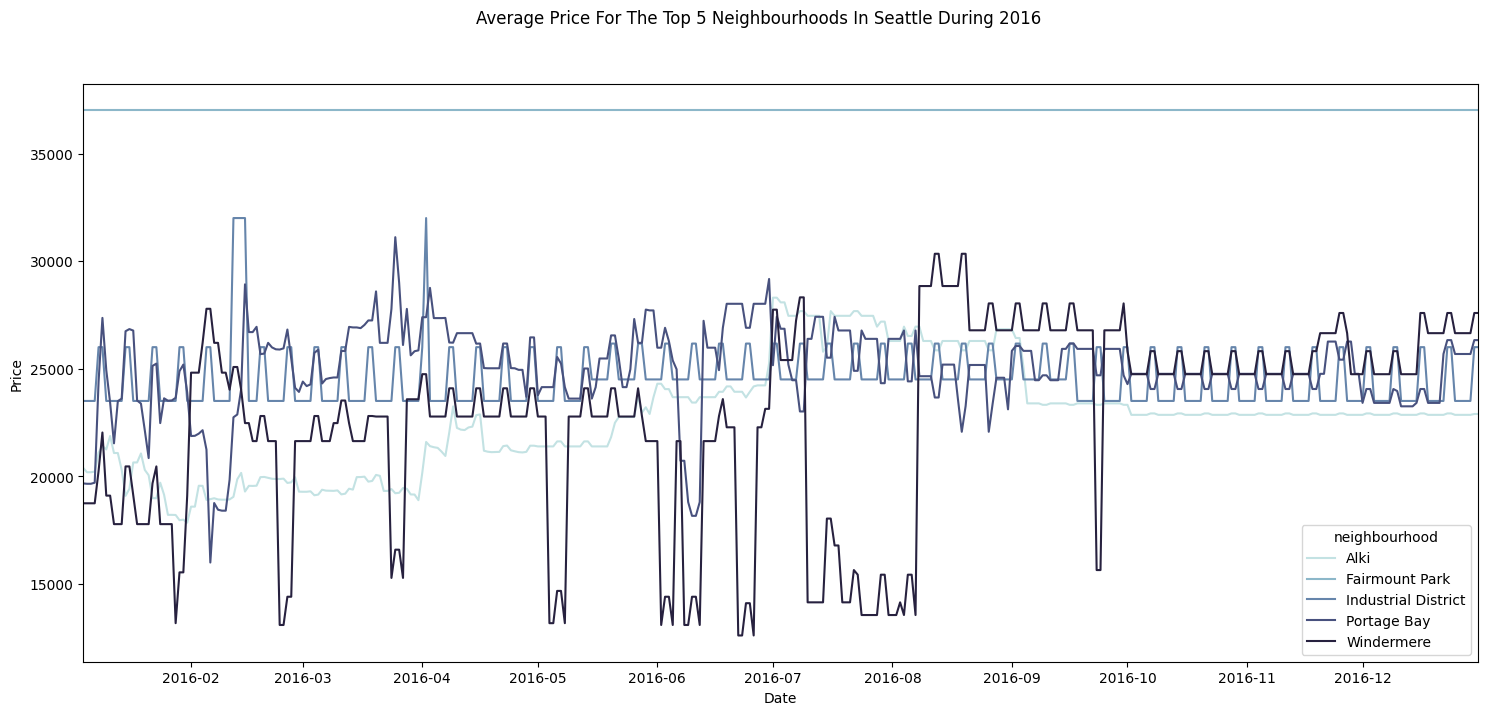

In [20]:
# Average price for top neighbourhoods
price_top_neighbourhood = data.groupby(['date', 'neighbourhood'])['price'].mean().reset_index()
price_top_neighbourhood = price_top_neighbourhood[price_top_neighbourhood['neighbourhood'].isin(top_neighbourhoods['neighbourhood'])]

# Lineplot
figure, axes = lineplot(price_top_neighbourhood, 'date', 'price', 'neighbourhood')
figure.suptitle('Average Price For The Top 5 Neighbourhoods In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')

### Bookings

Text(0, 0.5, 'Bookings')

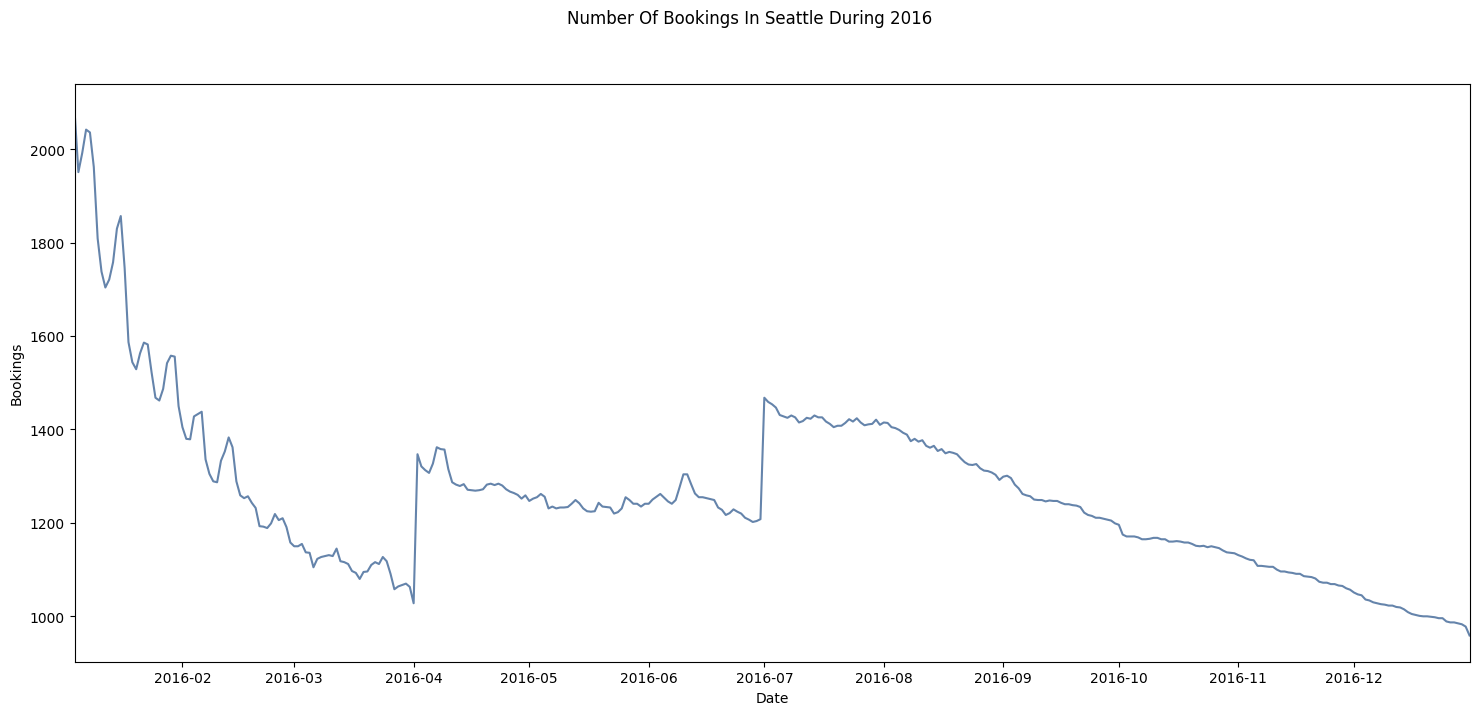

In [21]:
# Bookings
bookings = data[data['available'] == 0.0].groupby('date')['listing_id'].nunique().reset_index().rename(columns={'listing_id': 'bookings'})

# Lineplot
figure, axes = lineplot(bookings, 'date', 'bookings')
figure.suptitle('Number Of Bookings In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Bookings')

#### Bookings per neighbourhood

In [22]:
# Parameters
top = 5

# Bookings per neighbourhood
bookings_neighbourhood = data[data['available'] == 0.0].groupby(['neighbourhood'])['listing_id'].nunique().reset_index().rename(columns={'listing_id': 'bookings'})

# Top neighbourhoods
top_neighbourhoods = bookings_neighbourhood.sort_values('bookings', ascending=False).reset_index(drop=True).iloc[:top]

# Display
display(top_neighbourhoods)

,neighbourhood,bookings
0,Capitol Hill,293
1,Ballard,189
2,Belltown,184
3,Queen Anne,166
4,Minor,152


Text(0, 0.5, 'Bookings')

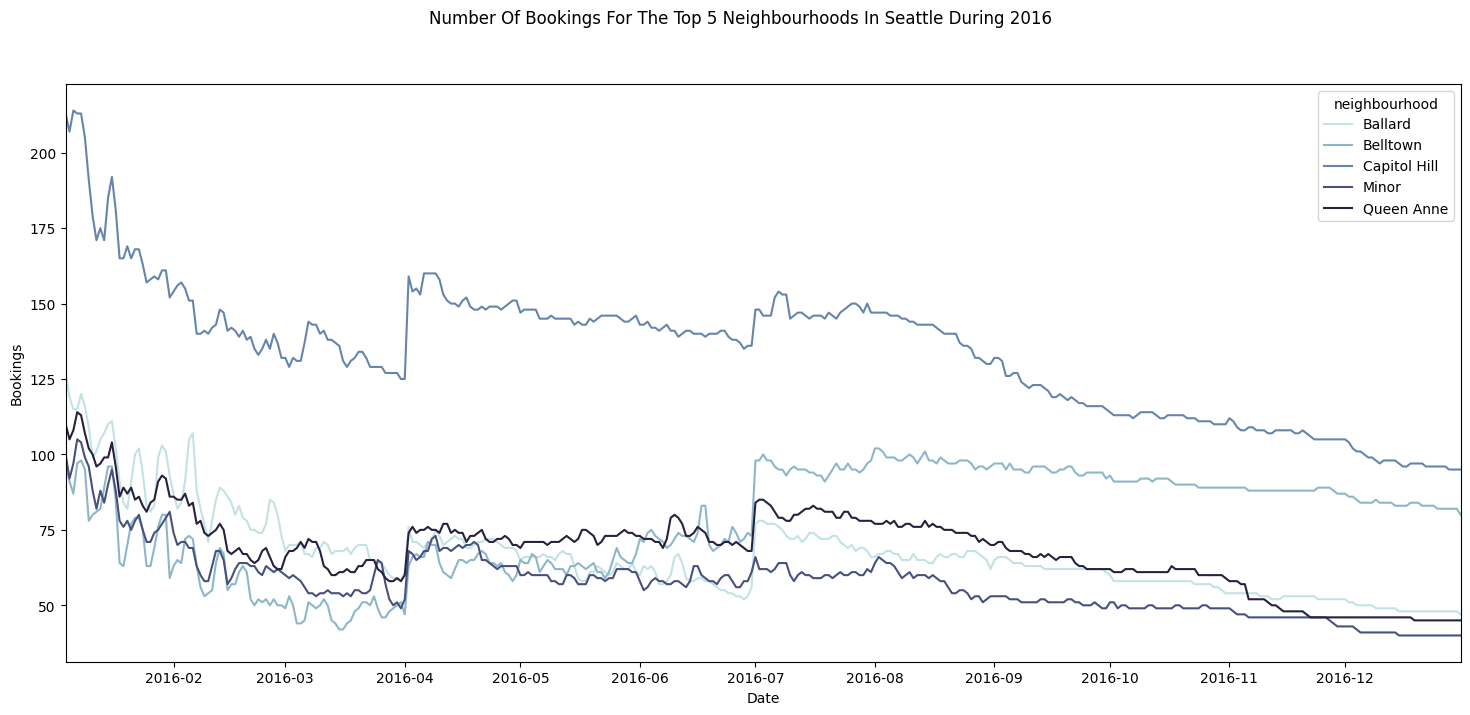

In [23]:
# Bookings for top neighbourhoods
bookings_top_neighbourhood = data[data['available'] == 0.0].groupby(['date', 'neighbourhood'])['listing_id'].nunique().reset_index().rename(columns={'listing_id': 'bookings'})
bookings_top_neighbourhood = bookings_top_neighbourhood[bookings_top_neighbourhood['neighbourhood'].isin(top_neighbourhoods['neighbourhood'])]

# Lineplot
figure, axes = lineplot(bookings_top_neighbourhood, 'date', 'bookings', 'neighbourhood')
figure.suptitle('Number Of Bookings For The Top 5 Neighbourhoods In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Bookings')

### Feature importance

In [24]:
# Processing
X, y = process(listings)

In [25]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [26]:
# Model
model = GradientBoostingRegressor()

# Fitting model
model = model.fit(X_train, y_train)

# MSE
print(f'MSE train: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test:  {mean_squared_error(y_test, model.predict(X_test))}')

c:\Users\M85256\Desktop\E.ON\Udacity\airbnb\.venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 16968412.85813559
MSE test:  42220344.63852511


Text(0.5, 0.98, 'Feature importance')

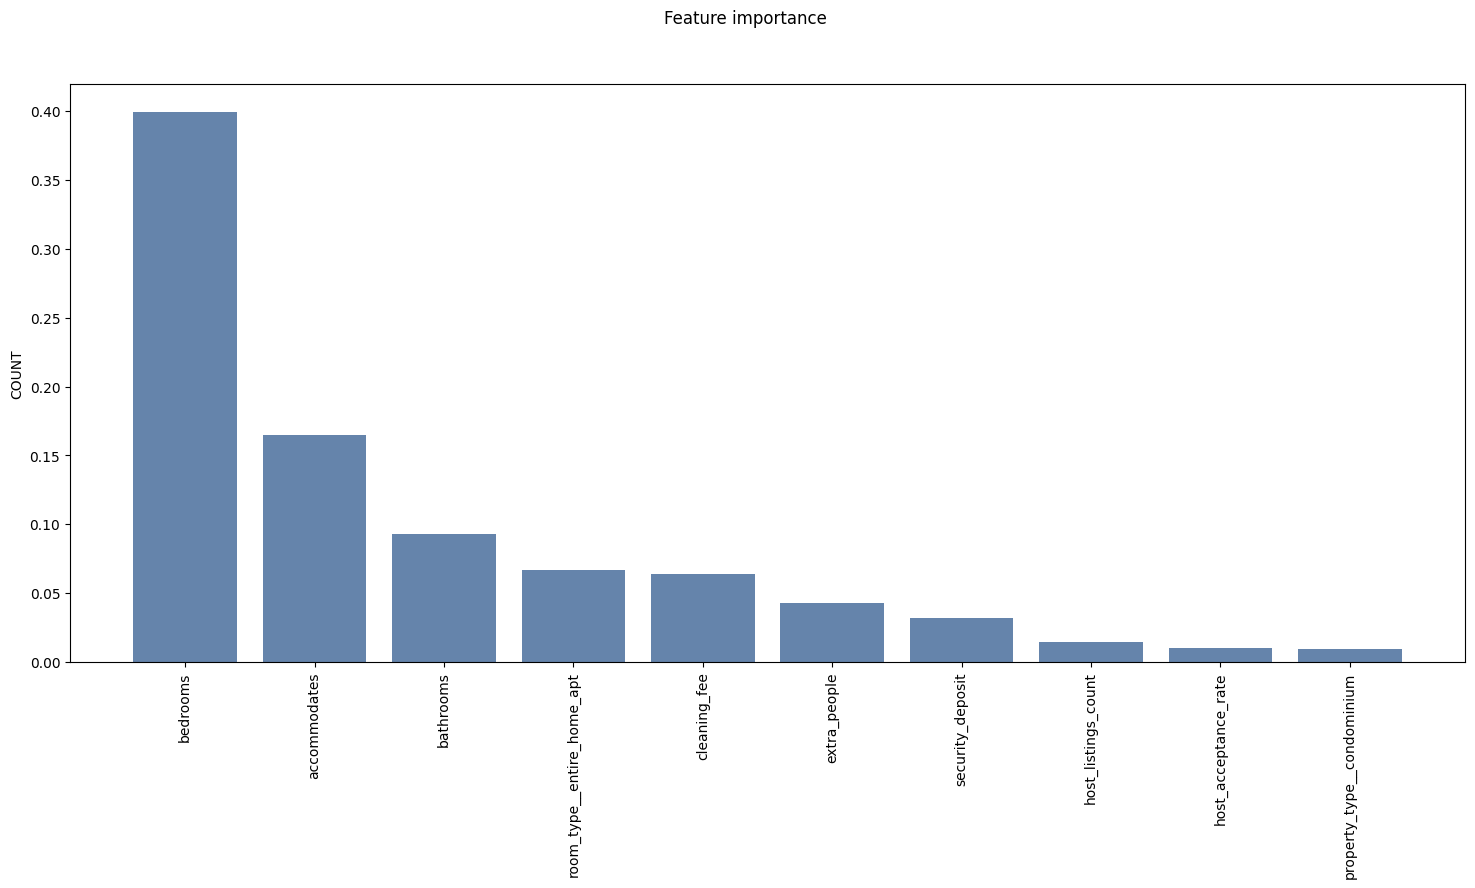

In [27]:
# Feature importance
feature_importance = pandas.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Barplot
figure, axes = barplot(feature_importance, 10, False)
figure.suptitle('Feature importance')